In [204]:
import pandas as pd

from IPython.display import HTML
style = "<style>div.warn { background-color: yellow; \
        border-color: red; border-left: 30px solid GOLD; \
        border-right: 30px solid GOLD; \
        padding: 1em;}</style>"
HTML(style)

<div class="warn"></div>

# Statistical Tests

### Normalizing Data
- normalizing different ranges of values down  bewteen 0 and 1

In [ ]:
from scipy import stats
from sklearn import preprocessing

def normalize_df(df):
    df.astype(float).values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df_normalized = pd.DataFrame(x_scaled)
    df_normalized.columns = df.columns
    return df_normalized

x,y = ['col_1', 'col_2']
df_to_normalize = df[x, y]
df_normalized = normalize_df(df_to_normalize)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df_normalized[[x]], label=x)
sns.distplot(df_normalized[[y]], label=y)
ax.legend()

### K-S Test
- compare if two sample are equally distributed
- H0: Distributions are the same: high p-value
- HA: Distributions are different: low p-value

In [ ]:
from scipy import stats

res, p_value = stats.ks_2samp(df_normalized[x], df_normalized[y])
print("K-S Test: ",res, "\t \t P-value: ", p_value)

# Hypothesis Testing

- tests can be either one or two sided/tailed 

H0 - Null Hypothesis: what we think is the real state right now

HA - Alternative Hypothesis: what we are trying to prove

Z - Test result value 

a - Significance Level Alpha 

#### p-value
[p-value_youtube](https://www.youtube.com/watch?v=eyknGvncKLw)

###### Probability Pr that H0 is false (and happened by acciedent) is called P-value. Probability of getting a value higher/lower than the test value Z for any other similar test sample.

> - The smaller the p-value is the smaller the chance that our result was luck ( for example: out of a test sample of the data)
>
> - The probability of this result happening by chance. p-value small = result was no luck (H0 TRUE)
> - Die Wahrscheinlichkeit dass das Ergebnis durch Zufall entstanden ist. p-value klein = kein Zufall (H0 TRUE)


- The smaller the P-value the greater the evidence against the H0 Hypothesis. 
- Umso kleiner der p-value umso größer der Beweis gegen die H0 Hypothese.
    - p-value < 0.01 means strong evidence against H0
    - p-value > 0.1  means little or no evidence against H0
- if we have a given significance level a
    - reject H0 if p-value < a
    - then we can say there is significant evidence against the H0
    


### Pearson’s correlation coefficient

* “Amount of linear dependence”

### Spearman's correlation coefficient

<div class="warn"></div>

# Pandas


In [116]:
data_folder = './data/quackers/'
df = pd.read_csv(data_folder + 'quakers_nodelist.csv')
df.head(3)

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567


### >>> rename columns

In [117]:
df.rename({'Historical Significance':'Job', 'Birthdate':'Born', 'Deathdate':'Died'}, axis=1, inplace=True)
df.head(3)

,Name,Job,Gender,Born,Died,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567


### >>> TYPES
### change type
[str, int, float, object]


In [118]:
df['Born'] = df['Born'].astype(float)
#df = df.astype(object)

### replace nan before change type

In [120]:
df['ID'] = df['ID'].fillna(0).astype(int)

### get type of col or df

In [119]:
df.dtypes

Name       object
Job        object
Gender     object
Born      float64
Died        int64
ID          int64
dtype: object

###  na's on each column of df


In [100]:
# print all na in df
print(df.isna().sum())

# fill na in col
df['Job'].fillna(value="unknown", inplace=True)

Name      0
Job       2
Gender    0
Born      0
Died      0
ID        0
dtype: int64


### >>> drop
* inplace = True
* inplace means: assign directly to the dataframe, no need to set it to a new 'variable' when set True
### remove rows

In [108]:
# remove null values from column
print(df.shape)
index_to_remove = df[df['Job'].isnull()].index
df.drop(index=index_to_remove, inplace=True)
print(df.shape)

(119, 6)
(117, 6)


### remove columns

In [105]:
df.drop(columns=['Died'], inplace=True)
df.head(2)

,Name,Job,Gender,Born,ID
0,Joseph Wyeth,religious writer,male,1663,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,10011149


### remove cols and rows with all nan

In [94]:
df_voters = pd.read_excel('./data/'  + 'voters.xls', skiprows=3, nrows=32) 
print("raw: ", df_voters.shape)

df_voters.dropna(how='all', axis='columns', inplace=True)
df_voters.dropna(how='all', axis='rows', inplace=True)

print("clean: ", df_voters.shape)

raw:  (32, 64)
clean:  (26, 23)


<div class="warn"></div>

# Merging

merge two dataframes on a key that is contained in both

- left: keep all KEYS from the left frame
- right: keep all KEYS from the left frame
- inner: keep KEYS that occur in both frames
- outer: keep all KEYS from both frames


MERGE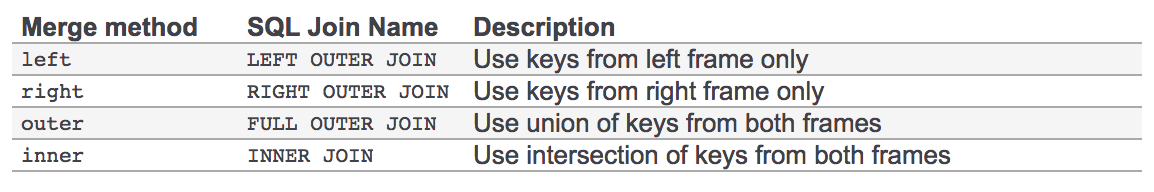

### >>> Merge

In [175]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['##', '##', '##', '##'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


print(left,'\n\n', right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3 

   key1 key2   C   D
0   K0   K0  ##  D0
1   K1   K0  ##  D1
2   K1   K0  ##  D2
3   K2   K0  ##  D3


In [176]:
result = pd.merge(left, right, on=['key1', 'key2'], how='inner')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,##,D0
1,K1,K0,A2,B2,##,D1
2,K1,K0,A2,B2,##,D2


### >>> Concat vs Append
"appending data"

In [170]:
df1 = pd.DataFrame({'A': ['O', 'O', 'O', 'O'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['K', 'A5', 'A6', 'A7']})


df3 = pd.DataFrame({'A': ['X', 'A9', 'A10', 'A11'],
                    'B': ['X', 'B9', 'B10', 'B11']},
                   index=[8, 9, 10, 11])

In [171]:
result = pd.concat([df1, df2, df3])
result

/Users/josefweber/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,A,B,C,D
0,O,B0,C0,D0
1,O,B1,C1,D1
2,O,B2,C2,D2
3,O,B3,C3,D3
0,K,NaN,NaN,NaN
1,A5,NaN,NaN,NaN
2,A6,NaN,NaN,NaN
3,A7,NaN,NaN,NaN
8,X,X,NaN,NaN
9,A9,B9,NaN,NaN


In [132]:
result = df1.append([df2])
result

,A,B,C,D
0,O,B0,C0,D0
1,O,B1,C1,D1
2,O,B2,C2,D2
3,O,B3,C3,D3
4,K,K,K,K
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### differences between two dataframes/series
append first and then drop duplicates results in the difference


In [ ]:
pd.concat([a["key"], b["key"]]).drop_duplicates(keep=False)

<div class="warn"></div>

# Groupby
.agg()
- size()
- count()
- mean()
- min/max

In [306]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot','Parrot'],
                'Max Speed' : [380., 370., 24., 26.,90.],
                  'Max Age' : [4, 6, 6, 3, 9],
                     'Name' : ["Jess", "Jeff", "Joe", "Kevin", "Jess"]})
df

,Animal,Max Speed,Max Age,Name
0,Falcon,380.0,4,Jess
1,Falcon,370.0,6,Jeff
2,Parrot,24.0,6,Joe
3,Parrot,26.0,3,Kevin
4,Parrot,90.0,9,Jess


In [307]:
result = df.groupby(['Name','Animal']).max()
result

Max Speed  Max Age
Name  Animal                    
Jeff  Falcon      370.0        6
Jess  Falcon      380.0        4
      Parrot       90.0        9
Joe   Parrot       24.0        6
Kevin Parrot       26.0        3

### groupby on groupby
using level to choose by which of the keys we aggregate

level 0 = Name // level 1 = Animal

In [309]:
result.groupby(level=0).max()

,Max Speed,Max Age
Name,,
Jeff,370.0,6
Jess,380.0,9
Joe,24.0,6
Kevin,26.0,3


### group multiple columns
- unstack

In [302]:
result = df.groupby(['Name','Animal']).size().unstack()
result

Animal,Falcon,Parrot
Name,,
Jeff,1.0,NaN
Jess,1.0,1.0
Joe,NaN,1.0
Kevin,NaN,1.0


<div class="warn"></div>

# Graphs 

### Crosstab
computes a frequency table of two factor ocurrences

In [ ]:
adjacency = pd.crosstab(df_combats_new["Winner"], df_combats_new["Loser"], margins=False

<div class="warn"></div>

# Machine Learning

 - X  feature matrix (n cols)
 - y  classifier (has to be 1 col)
 
 Machine learning methods
 - ridge regression
 - logistic regression
 - SVM
 - Random Forests

- Classification
    - predict: 1 dim array [0 or 1s]
    - predict_proba: 2 dim array [p for data belong to class 0, p for data belong to class 1]
- Regression

In [ ]:
from sklearn.metrics import f1_score


### Eliminating Categorical data
making categorical data to numerical

In [ ]:
dummie_data = pd.get_dummies(dummie_data)

### Normalizing Data
mean = ~ 0
variance = 1

In [ ]:
def standardize_df(df):
    """
    source: https://github.com/pandas-dev/pandas/issues/18028
    standardizes a series with name 'label' within the pd.DataFrame
    result has std=1 and mean=0
    return df
    """
    df = df.copy(deep=True)
    avg = df.mean()
    std = df.std()
    series_standardized = (df - avg) / std
    return series_standardized

dummie_data_normalized = standardize_df(dummie_data)

### Splitting Data 
- X_train:
- X_test:
- y_train:
- y_test:


- ratio: seperate data into 0.9 train and 0.1 test data

In [ ]:
def split_to_train_and_test_set(x, y, ratio, seed=1):
    # sets a seed for the split
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

X_train, X_test, y_train, y_test = split_to_train_and_test_set(X.values, y.values, ratio=0.9)

### Split library version

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=10, max_depth=2)
forest.fit(x_tr, y_tr)
y_tester = forest.predict(x_te)


### Logistic Regression

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_tr, y_tr)

pred = logistic.predict_proba(x_te)[:,1] # gives two probabilities (look desk at top)
pred = logistic.predict(x_te) # single classification value 0 or 1

y_tester = get_prediction(pred, 0.5)

## F1 Score

In [ ]:
f1 = f1_score(y_te, y_tester)

### Confusion matrix
table layout that allows visualization of the performance of an algorithm

-> compares the prediction results (predicted, true)

confusion matrix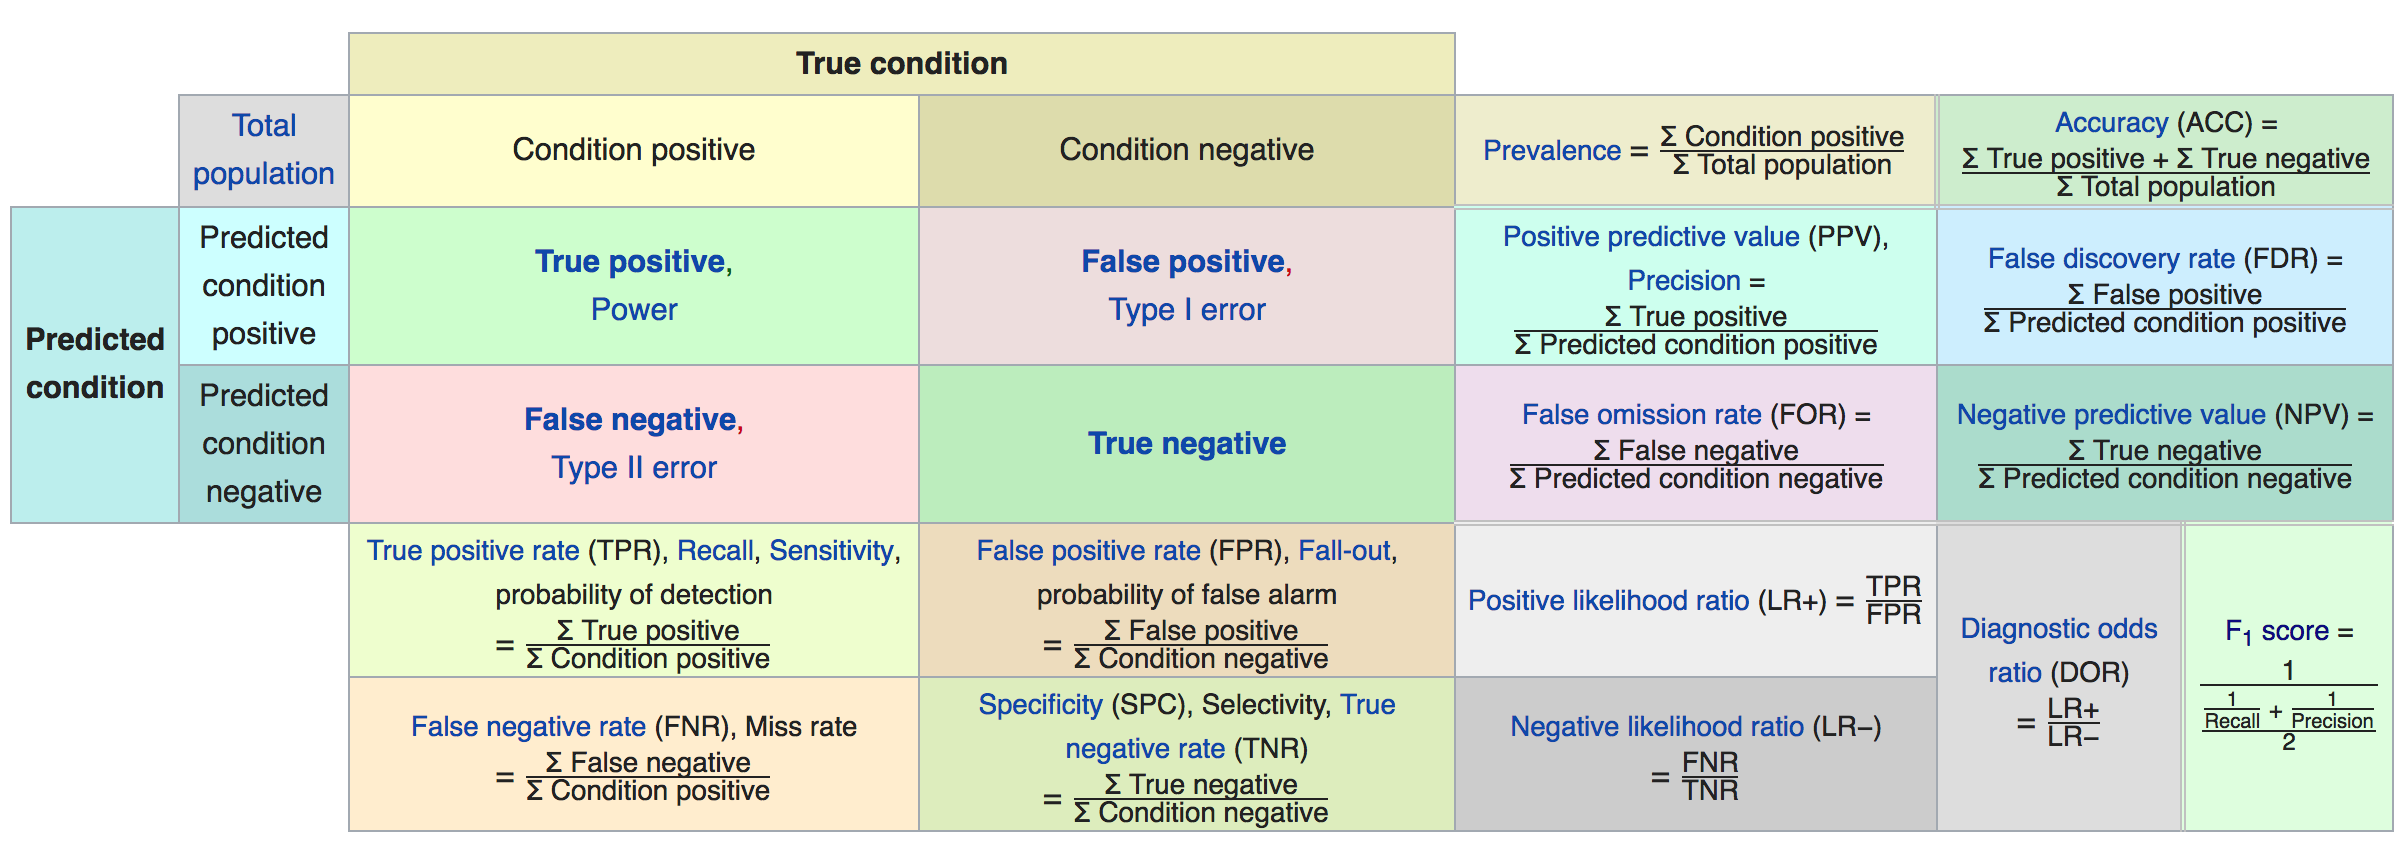


In [ ]:
def build_confusion_matrix(predicted, true_values, class_to_choose = 'adopted'):
    '''
    Makes the confusion matrix and manually calculates the values for
    accuracy, precision, recall and f1 score

    'choose' chooses the class with which accuracy, precision,
    recall and f1_score is calculated    
    '''
    
    TP = np.sum(np.logical_and(predicted == 1, true_values == 1))
    TN = np.sum(np.logical_and(predicted == 0, true_values == 0))
    FP = np.sum(np.logical_and(predicted == 1, true_values == 0))
    FN = np.sum(np.logical_and(predicted == 0, true_values == 1))
    
    # For choose = 1, the function chooses class 'adopted' as the main class
    if class_to_choose == 'adopted':
        accuracy = (TP+TN)/len(true_values)
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        f1 = 1/(0.5*(1/precision+1/recall))
    else:
        '''
        For else, the function chooses class 'not adopted' as the main class
        by taking the the True Negative as the value for calculating
        accuracy, precision, recall, f1 score
        '''
        accuracy = (TN+TP)/len(true_values)
        precision = TN/(TN+FN)
        recall = TN/(TN+FP)
        f1 = 1/(0.5*(1/precision+1/recall))
    return accuracy, precision, recall, f1
    
# Outputs the predictions with a specific threshold
def get_prediction(pred, threshold):
    pred_threshold = (pred > threshold).astype(int)
    return pred_thresholdd

# tries different treshholds
def find_threshold(pred, true_values, class_to_choose):
    '''
    Creates a pandas data frame for plotting the respective values 
    with a threshold from 0 to 1. 
    Returns: 
       - for all the thresholds their accuarcy, precisions, recalls and f1 scores
    '''
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    for i in np.linspace(0, 1, 41):
        predictions = get_prediction(pred, i)
        accu_, prec_, rec_, f1_= build_confusion_matrix(predictions, true_values, class_to_choose)
        accuracies.append(accu_)
        precisions.append(prec_)
        recalls.append(rec_)
        f1_scores.append(f1_)
        
    df_data = pd.DataFrame(dict(x = np.linspace(0, 1, 41), 
                                Accuracy = accuracies, 
                                Precision = precisions, 
                                Recall = recalls, 
                                F1_Score = f1_scores))
    return df_data

# Plotting values according to the threshold
def add_plot(df, title):
    fig, ax = plt.subplots(figsize=(16, 5))
    # select current axis
    plt.sca(ax)
    # Plot the orbital period with horizontal boxes
    plt.plot('x', 'Accuracy', data = df)#palette="Set3")
    plt.plot('x', 'Precision', data = df)
    plt.plot('x', 'Recall', data = df)
    plt.plot('x', 'F1_Score', data = df)
    plt.legend()

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(title=title)
    ax.set(xlabel='Threshold')
    sns.despine(trim=False, left=False)

sns.set(style="ticks")
add_plot(df_data_adopted, "Threshold for adapoted animals")

# y_pred is a probability -> take first column
df_results = find_threshold(y_pred[:,1], y_te, class_to_choose='adopted')


### k-fold Cross Validation
we devide the data into k=5 subsets
- 4 we use to train the model
- 1 we use to test the model

we do this with all possible permutations

#### Why?
to test which ML method is the best

#### How?
for each train test configuration we run all desired methods - at the end we compare which method dominated

In [ ]:
def build_k_indices(y, k_fold, seed):
    """
    Function that builds k random indices from the length of the
    dataset for the cross validation
    Returns
       - random indeces from our dataset
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, estim, depth):
    '''
    Does the k-fold (5) split on the dataset and performs cross validation
    '''
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_c = y[te_indice]
    y_tr_c = y[tr_indice]
    x_te_c = x[te_indice]
    x_tr_c = x[tr_indice]
    
    forest = RandomForestClassifier(n_estimators=estim,
                            max_depth=depth).fit(x_tr, y_tr)
    y_tester = forest.predict(x_te)
    f1 = f1_score(y_te, y_tester)
    return f1
    


# Performs the cross validation testing on the data   
def cross_val_test(y, x):
    seed = 1
    k_fold=5
    k_indices = build_k_indices(y, k_fold, seed)
    f1_kfold = []
    f1_full = []
    estim = [10,25,50,100]
    depth = [2,4,10]
    for esti in estim:
        for dept in depth:  
            for i in range(k_fold):
                f1 = cross_validation(y, x, k_indices, i, esti, dept)
                f1_kfold.append(f1)
            f1_full.append(np.sum(f1_kfold)/k_fold)
            print('For {} n_estimators and {} max_depth we get an F1 score of {},'.format(esti,dept, np.sum(f1_kfold)/k_fold))
            f1_kfold = []
    return f1_full

### Grid Search
the traditional way of performing hyperparameter optimization has been grid search

<div class="warn"></div>